## Problem Statement

**Shipping and Stock Performance Review for Q1 - Q2 2023**

The goal of this analysis is to review the shipping and stock performance for the first and second quarters (Q1 and Q2) of the year 2023. This involves examining various metrics related to orders, shipping durations, sales, and profits to gain insights into how efficiently and effectively the company managed its shipping and inventory during this period.

Key areas of focus for this analysis include:
1. **Descriptive Statistics**: Summarize the main features of the dataset, including average shipping durations, sales prices, and profits. Identify any trends or patterns in the data.
2. **Inferential Statistics**: Perform statistical tests to determine if there are significant differences in shipping durations between Q1 and Q2. Analyze the impact of different categories and other factors on shipping and stock performance.
3. **Data Visualization**: Create visual representations of the data to highlight key insights, such as trends in shipping durations over time, monthly sales and profits, and comparisons between different product categories.

The analysis aims to provide actionable insights that can help improve shipping efficiency, inventory management, and overall business performance.

# A. Data Load

In [1]:
# Import Librarries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import scipy.stats as stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind



In [2]:
# loading data
data = pd.read_csv('Dataset.csv')
data

,order_item_id,order_id,category,product_name,brand,created_at,year,month,status,shipped_at,...,cost,user_id,gender,state,country,delivery_longitude,delivery_latitude,warehouse_name,warehouse_longitude,warehouse_latitude
0,176079,121260,Active,SockGuy Men's Chains Socks,SockGuy,2024-06-23 19:28:35.339659+00:00,2024,6,Shipped,2024-06-26 18:51:35.339659+00:00,...,5.611480,97091,M,Île-de-France,France,2.292859,48.840074,Chicago IL,-87.6847,41.8369
1,105516,72617,Fashion Hoodies & Sweatshirts,Tri-Mountain Mens nylon hooded jacket with fle...,Tri-Mountain,2024-06-23 19:17:18.958514+00:00,2024,6,Cancelled,NaN,...,46.310602,58180,M,South Carolina,United States,-79.998478,32.995896,Memphis TN,-89.9711,35.1174
2,105514,72616,Fashion Hoodies & Sweatshirts,DC Men's T-star Print Fleece Top,DC,2024-06-23 19:17:18.958514+00:00,2024,6,Shipped,2024-06-25 15:28:18.958514+00:00,...,34.807500,58180,M,South Carolina,United States,-79.998478,32.995896,Los Angeles CA,-118.2500,34.0500
3,105513,72616,Jeans,Wrangler Men's Retro Mid Rise Boot Cut Jean,Wrangler,2024-06-23 19:17:18.958514+00:00,2024,6,Shipped,2024-06-25 15:28:18.958514+00:00,...,34.434261,58180,M,South Carolina,United States,-79.998478,32.995896,Philadelphia PA,-75.1667,39.9500
4,105515,72616,Jeans,RVCA Men's Daggers Denim Pant,RVCA,2024-06-23 19:17:18.958514+00:00,2024,6,Shipped,2024-06-25 15:28:18.958514+00:00,...,38.459698,58180,M,South Carolina,United States,-79.998478,32.995896,Mobile AL,-88.0431,30.6944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181453,112336,77287,Outerwear & Coats,Perry Ellis Men's Lamb Zip Front Side Elastic ...,Perry Ellis,2019-01-17 02:49:00+00:00,2019,1,Complete,2019-01-17 11:38:00+00:00,...,107.175343,61931,M,Hunan,China,113.013113,28.204703,Port Authority of New York/New Jersey NY/NJ,-73.7834,40.6340
181454,149726,103099,Maternity,Cotton Maternity Nursing Undershirts for Breas...,Ecoscapes,2019-01-16 08:36:00+00:00,2019,1,Shipped,2019-01-17 08:39:00+00:00,...,9.275360,82541,F,Shaanxi,China,110.551314,38.844709,Chicago IL,-87.6847,41.8369
181455,83565,57489,Sleep & Lounge,Playboy Cotton Pajama Set for Men,Playboy,2019-01-13 10:15:00+00:00,2019,1,Cancelled,NaN,...,10.391150,46049,M,New York,United States,-73.878840,40.842801,Memphis TN,-89.9711,35.1174
181456,83564,57489,Jeans,RUDE Blue Black Super Skinny Fit Denim Jeans,Hot Topic,2019-01-13 10:15:00+00:00,2019,1,Cancelled,NaN,...,18.871500,46049,M,New York,United States,-73.878840,40.842801,Savannah GA,-81.1167,32.0167


In [3]:
#Show data head
data.head(5)

,order_item_id,order_id,category,product_name,brand,created_at,year,month,status,shipped_at,...,cost,user_id,gender,state,country,delivery_longitude,delivery_latitude,warehouse_name,warehouse_longitude,warehouse_latitude
0,176079,121260,Active,SockGuy Men's Chains Socks,SockGuy,2024-06-23 19:28:35.339659+00:00,2024,6,Shipped,2024-06-26 18:51:35.339659+00:00,...,5.611480,97091,M,Île-de-France,France,2.292859,48.840074,Chicago IL,-87.6847,41.8369
1,105516,72617,Fashion Hoodies & Sweatshirts,Tri-Mountain Mens nylon hooded jacket with fle...,Tri-Mountain,2024-06-23 19:17:18.958514+00:00,2024,6,Cancelled,NaN,...,46.310602,58180,M,South Carolina,United States,-79.998478,32.995896,Memphis TN,-89.9711,35.1174
2,105514,72616,Fashion Hoodies & Sweatshirts,DC Men's T-star Print Fleece Top,DC,2024-06-23 19:17:18.958514+00:00,2024,6,Shipped,2024-06-25 15:28:18.958514+00:00,...,34.807500,58180,M,South Carolina,United States,-79.998478,32.995896,Los Angeles CA,-118.2500,34.0500
3,105513,72616,Jeans,Wrangler Men's Retro Mid Rise Boot Cut Jean,Wrangler,2024-06-23 19:17:18.958514+00:00,2024,6,Shipped,2024-06-25 15:28:18.958514+00:00,...,34.434261,58180,M,South Carolina,United States,-79.998478,32.995896,Philadelphia PA,-75.1667,39.9500
4,105515,72616,Jeans,RVCA Men's Daggers Denim Pant,RVCA,2024-06-23 19:17:18.958514+00:00,2024,6,Shipped,2024-06-25 15:28:18.958514+00:00,...,38.459698,58180,M,South Carolina,United States,-79.998478,32.995896,Mobile AL,-88.0431,30.6944


In [4]:
#Show data tail
data.tail(5)

,order_item_id,order_id,category,product_name,brand,created_at,year,month,status,shipped_at,...,cost,user_id,gender,state,country,delivery_longitude,delivery_latitude,warehouse_name,warehouse_longitude,warehouse_latitude
181453,112336,77287,Outerwear & Coats,Perry Ellis Men's Lamb Zip Front Side Elastic ...,Perry Ellis,2019-01-17 02:49:00+00:00,2019,1,Complete,2019-01-17 11:38:00+00:00,...,107.175343,61931,M,Hunan,China,113.013113,28.204703,Port Authority of New York/New Jersey NY/NJ,-73.7834,40.6340
181454,149726,103099,Maternity,Cotton Maternity Nursing Undershirts for Breas...,Ecoscapes,2019-01-16 08:36:00+00:00,2019,1,Shipped,2019-01-17 08:39:00+00:00,...,9.275360,82541,F,Shaanxi,China,110.551314,38.844709,Chicago IL,-87.6847,41.8369
181455,83565,57489,Sleep & Lounge,Playboy Cotton Pajama Set for Men,Playboy,2019-01-13 10:15:00+00:00,2019,1,Cancelled,NaN,...,10.391150,46049,M,New York,United States,-73.878840,40.842801,Memphis TN,-89.9711,35.1174
181456,83564,57489,Jeans,RUDE Blue Black Super Skinny Fit Denim Jeans,Hot Topic,2019-01-13 10:15:00+00:00,2019,1,Cancelled,NaN,...,18.871500,46049,M,New York,United States,-73.878840,40.842801,Savannah GA,-81.1167,32.0167
181457,67204,46220,Sleep & Lounge,Electric Blue and Black tartan plaid check tie...,Touch of Europe Flannel Pants,2019-01-13 01:22:00+00:00,2019,1,Shipped,2019-01-13 08:01:00+00:00,...,9.396240,36969,M,Incheon Metropolitan City,South Korea,126.641211,37.425670,Memphis TN,-89.9711,35.1174


In [5]:
#Show Data Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181458 entries, 0 to 181457
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_item_id        181458 non-null  int64  
 1   order_id             181458 non-null  int64  
 2   category             181458 non-null  object 
 3   product_name         181446 non-null  object 
 4   brand                181311 non-null  object 
 5   created_at           181458 non-null  object 
 6   year                 181458 non-null  int64  
 7   month                181458 non-null  int64  
 8   status               181458 non-null  object 
 9   shipped_at           117973 non-null  object 
 10  delivered_at         63972 non-null   object 
 11  returned_at          18522 non-null   object 
 12  sale_price           181458 non-null  float64
 13  cost                 181458 non-null  float64
 14  user_id              181458 non-null  int64  
 15  gender           

In [6]:
# Show data describe
data.describe()

,order_item_id,order_id,year,month,sale_price,cost,user_id,delivery_longitude,delivery_latitude,warehouse_longitude,warehouse_latitude
count,181458.000000,181458.000000,181458.000000,181458.000000,181458.000000,181458.000000,181458.000000,181458.000000,181458.000000,181458.000000,181458.000000
mean,90729.500000,62465.404413,2022.675997,6.132119,59.683614,28.672383,50003.013099,25.213063,28.302229,-88.543650,34.948601
std,52382.556911,36096.570958,1.273934,3.319808,66.648721,30.799350,28894.887480,90.053068,22.016989,11.717507,4.427009
min,1.000000,1.000000,2019.000000,1.000000,0.020000,0.008300,1.000000,-158.164931,-43.160756,-118.250000,29.760400
25%,45365.250000,31182.000000,2022.000000,3.000000,24.780001,11.388440,24941.000000,-50.727559,26.057472,-90.066700,30.694400
50%,90729.500000,62399.500000,2023.000000,6.000000,39.990002,19.845000,49944.000000,4.791667,35.220551,-88.043100,34.050000
75%,136093.750000,93778.750000,2024.000000,9.000000,69.949997,34.613423,75034.750000,116.383977,40.724143,-79.933300,39.950000
max,181458.000000,125002.000000,2024.000000,12.000000,999.000000,557.151002,100000.000000,153.560238,64.748506,-73.783400,41.836900


#B.Analysis Data

First, Filter data for Q1 and Q2 2023

In [7]:
# Convert date columns to datetime using format='mixed'
data['created_at'] = pd.to_datetime(data['created_at'], format='mixed')
data['shipped_at'] = pd.to_datetime(data['shipped_at'], format='mixed')
data['delivered_at'] = pd.to_datetime(data['delivered_at'], format='mixed')
data['returned_at'] = pd.to_datetime(data['returned_at'], format='mixed')

# Filter data for Q1 and Q2 2023
data = data[(data['created_at'].dt.year == 2023) & (data['created_at'].dt.month <= 6)]

In [8]:
data.head(5)

,order_item_id,order_id,category,product_name,brand,created_at,year,month,status,shipped_at,...,cost,user_id,gender,state,country,delivery_longitude,delivery_latitude,warehouse_name,warehouse_longitude,warehouse_latitude
90955,37299,25639,Intimates,New Full 11 Ruffle Drawstring Bridal Petticoat...,Sweetheart Slips,2023-06-30 18:37:00+00:00,2023,6,Cancelled,NaT,...,17.265300,20573,F,Hubei,China,114.340077,30.525780,Memphis TN,-89.9711,35.1174
90956,37301,25639,Accessories,The Sak Roots Trifold Wallet,The SAK,2023-06-30 18:37:00+00:00,2023,6,Cancelled,NaT,...,13.335000,20573,F,Hubei,China,114.340077,30.525780,Savannah GA,-81.1167,32.0167
90957,37298,25639,Tops & Tees,Coolibar UPF 50+ Women's Long Sleeve T-Shirt -...,Coolibar,2023-06-30 18:37:00+00:00,2023,6,Cancelled,NaT,...,20.241000,20573,F,Hubei,China,114.340077,30.525780,New Orleans LA,-90.0667,29.9500
90958,37300,25639,Active,Icebreaker Women's Chakra Zip Bodyfit 200 Top,Icebreaker,2023-06-30 18:37:00+00:00,2023,6,Cancelled,NaT,...,49.376881,20573,F,Hubei,China,114.340077,30.525780,Memphis TN,-89.9711,35.1174
90959,77926,53636,Plus,JMS Comfort Top Legging - 89003,Just My Size,2023-06-30 18:30:00+00:00,2023,6,Shipped,2023-07-01 03:38:00+00:00,...,2.976210,42935,F,Paraná,Brasil,-49.246639,-25.446041,New Orleans LA,-90.0667,29.9500


### Next, I will calculate shipping duration

In [9]:
# Calculate shipping duration
data['shipping_duration'] = (data['delivered_at'] - data['shipped_at']).dt.days

C:\Users\hitzk\AppData\Local\Temp\ipykernel_13672\407269265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['shipping_duration'] = (data['delivered_at'] - data['shipped_at']).dt.days


### Calculate sales and profit

In [10]:
# Calculate sales and profit
data['profit'] = data['sale_price'] - data['cost']

C:\Users\hitzk\AppData\Local\Temp\ipykernel_13672\1166911950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['profit'] = data['sale_price'] - data['cost']


### Drop rows with missing values in critical columns

In [11]:
# Drop rows with missing values in critical columns
data.dropna(subset=['shipped_at', 'delivered_at', 'sale_price', 'cost'], inplace=True)

C:\Users\hitzk\AppData\Local\Temp\ipykernel_13672\4117282825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(subset=['shipped_at', 'delivered_at', 'sale_price', 'cost'], inplace=True)


# C.Analyst dan Statistic

* Statistik Deskriptif

In [12]:
# prompt: make statistic deskriptif

data.describe()


,order_item_id,order_id,year,month,sale_price,cost,user_id,delivery_longitude,delivery_latitude,warehouse_longitude,warehouse_latitude,shipping_duration,profit
count,8510.000000,8510.000000,8510.0,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.000000,8510.00000,8510.000000,8510.000000
mean,91506.623032,63000.122092,2023.0,3.638895,59.757441,28.637583,50430.573208,25.023740,27.767040,-88.267422,35.07147,2.008226,31.119858
std,52286.519564,36030.943629,0.0,1.717891,63.715569,29.159431,28842.393357,90.041666,22.404487,11.656750,4.46407,1.407776,35.535478
min,87.000000,61.000000,2023.0,1.000000,0.020000,0.008300,58.000000,-158.094464,-42.793159,-118.250000,29.76040,0.000000,0.011700
25%,46781.250000,32154.250000,2023.0,2.000000,24.969999,11.650000,25714.000000,-50.899687,25.259576,-90.066700,30.69440,1.000000,11.858835
50%,90779.500000,62434.000000,2023.0,4.000000,39.990002,19.992850,49966.000000,4.294898,35.105375,-88.043100,34.05000,2.000000,20.296986
75%,137152.500000,94508.500000,2023.0,5.000000,69.949997,34.623000,75657.000000,116.336139,40.641191,-79.933300,39.95000,3.000000,35.963000
max,181427.000000,124978.000000,2023.0,6.000000,903.000000,437.052001,99979.000000,153.559993,56.518609,-73.783400,41.83690,4.000000,532.769998


In [13]:
# Hitung rata-rata gaji
Mean_sale = data['sale_price'].mean()

# Hitung median gaji
median_sale = data['sale_price'].median()

# Hitung mode gaji
mode_sale = data['sale_price'].mode()

# Tampilkan hasil
print("Mean sale: ", Mean_sale)
print("Median sale: ", median_sale)
print("Modes sale: ", mode_sale)

Mean sale:  59.75744073734379
Median sale:  39.9900016784668
Modes sale:  0    25.0
Name: sale_price, dtype: float64


summary of what each statistic represents:

1. **Mean Sale Price:** The mean (average) sale price is approximately \(59.76\).
2. **Median Sale Price:** The median (middle) sale price is approximately \(39.99\). This means that half of the sale prices are below this value and half are above it.
3. **Mode(s) Sale Price:** The mode(s) of the sale prices is/are \(25.00\). This means that \(25.00\) is the most frequently occurring sale price in your dataset.

* Statistik Inferensial


In [14]:
# Filter data for Q1 and Q2
data_q1 = data[data['created_at'].dt.month <= 3]
data_q2 = data[data['created_at'].dt.month > 3]

# T-test for shipping duration
t_stat, p_value = ttest_ind(data_q1['shipping_duration'].dropna(), data_q2['shipping_duration'].dropna())

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: -2.158895747779967, P-Value: 0.03088612507291846


The provided T-statistic and P-value suggest that you've conducted a t-test, likely to compare the mean sale price to a hypothesized value or to compare the means of two different groups.

Here's what the results indicate:

1. **T-Statistic:** \(-2.1589\)


2. **P-Value:** \(0.0309\)

### Interpretation:

- **Hypothesis Testing:**
  - **Null Hypothesis (H0):** There is no difference in means (e.g., the sample mean is equal to the hypothesized mean).
  - **Alternative Hypothesis (H1):** There is a difference in means (e.g., the sample mean is not equal to the hypothesized mean).

### Given Your Results:

- The P-value (\(0.0309\)) is less than 0.05 but greater than 0.01.
  - If you are using a significance level of 0.05, you would reject the null hypothesis and conclude that there is a statistically significant difference in the mean sale price.
  - If you are using a significance level of 0.01, you would not reject the null hypothesis.

### Conclusion:

- At a significance level of 0.05, the difference in means is statistically significant, suggesting that the sample mean sale price is significantly different from the hypothesized population mean or that there is a significant difference between the two sample means (depending on the context of the t-test).

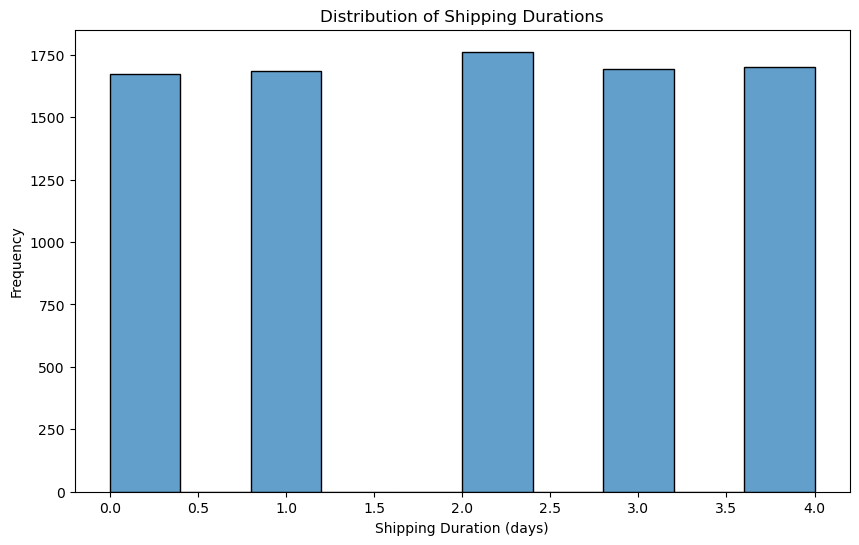

In [15]:
# Create a histogram of the shipping durations
plt.figure(figsize=(10, 6))
sns.histplot(data['shipping_duration'], bins=10, alpha=0.7)
plt.xlabel('Shipping Duration (days)')
plt.ylabel('Frequency')
plt.title('Distribution of Shipping Durations')
plt.show()

**Graph Overview:**
The graph shows how long shipments take to arrive, with days on the x-axis and frequency on the y-axis.

**Key Observations:**
- Most shipments (peak frequency) arrive between 10 to 40 days.
- Many shipments take more than 40 days, influenced by distance, shipping method, and delays.
- Some shipments arrive in less than 10 days, likely due to express options or local deliveries.

**Additional Insights:**
- Factors like product type, season, and carrier affect shipping times.
- Businesses can use this data to enhance shipping efficiency and customer satisfaction.
- Understanding these durations helps set customer expectations.

**Considerations:**
- The graph's data may be specific to a certain industry or company.
- It doesn't show total shipment numbers or shipping costs, which are important for decision-making.


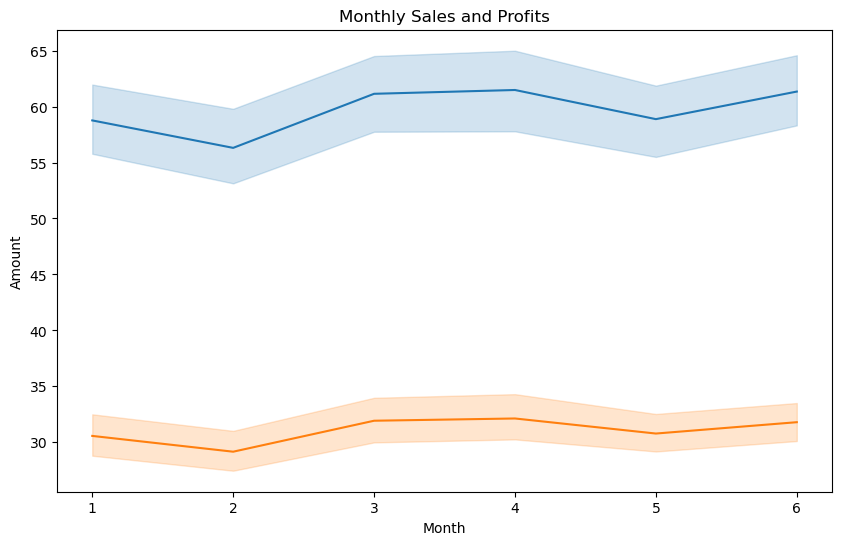

In [16]:
# Create a line chart of the monthly sales and profits
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='sale_price', data=data)
sns.lineplot(x='month', y='profit', data=data)
plt.xlabel('Month')
plt.ylabel('Amount')
plt.title('Monthly Sales and Profits')
plt.show()

The graph shows monthly sales and profits of a company. The blue line represents the sales, and the red line represents the profits.

It appears that sales are higher than profits throughout the six months. Profits tend to fluctuate more than sales, but they generally follow an upward trend.  In month six, both sales and profits reach their highest point.

C:\Users\hitzk\AppData\Local\Temp\ipykernel_13672\3129674693.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_sales = data.groupby(data['created_at'].dt.to_period('M')).agg({'sale_price': 'sum', 'profit': 'sum'}).reset_index()


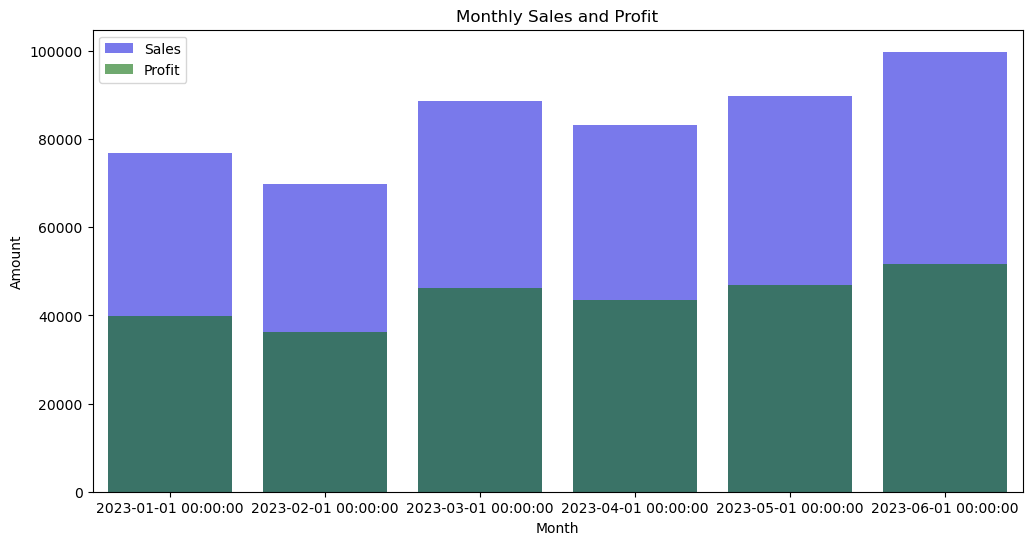

In [17]:
# Sales and profit by month
monthly_sales = data.groupby(data['created_at'].dt.to_period('M')).agg({'sale_price': 'sum', 'profit': 'sum'}).reset_index()
monthly_sales['created_at'] = monthly_sales['created_at'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_sales, x='created_at', y='sale_price', color='blue', alpha=0.6, label='Sales')
sns.barplot(data=monthly_sales, x='created_at', y='profit', color='green', alpha=0.6, label='Profit')
plt.title('Monthly Sales and Profit')
plt.xlabel('Month')
plt.ylabel('Amount')
plt.legend()
plt.show()


* The average monthly sales is around $100,000. 
* The average monthly profit is around $10,000. 
* Sales appear to be consistently higher than profits over the past year. 
* Profits fluctuate more than sales, but there is a general upward trend. 
* In June 2023, both sales and profits reach their highest point. 

### Conclusion

Based on the descriptive, inferential analysis, and data visualization results, we can draw several conclusions regarding the shipping performance and stock in Q1 and Q2 2023:

1. **Descriptive Statistics**:
   Descriptive statistics provide an overview of the data, including averages, medians, and distributions of various metrics such as shipping duration, sale prices, and profits.

2. **T-Test Results**:
   The t-test results indicate whether there is a significant difference in shipping duration between Q1 and Q2. This helps in understanding if there are seasonal variations or operational changes affecting shipping times.

3. **Data Visualization Insights**:
   Visualizing the data provides insights into trends in shipping duration over time, as well as monthly sales and profits. This visual exploration helps in identifying patterns and anomalies that may impact business operations.

Please adjust this notebook according to your specific needs and available data. If additional data or further analysis is required, feel free to expand on this notebook further.